<a href="https://colab.research.google.com/github/ShuichiroTsuda/Kaggle_Liverpool_Ion_Switching/blob/master/remove_data_drift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
from google.colab import drive
import os

class ColabKaggle:

    base = 'gdrive/My Drive/'

    def __init__(self):
        drive.mount('gdrive')

    def load_api_key(self, path):
        """
        example of path: path = 'Colab Notebooks/Kaggle/API_setup/kaggle.json'

        """
        path = self.base + path
        with open(path) as f:
            kaggle_api_key = json.load(f)

        filename = "/root/.kaggle/kaggle.json"
        os.makedirs(os.path.dirname(filename), exist_ok=True)

        with open(filename, 'w') as f:
            json.dump(kaggle_api_key, f)

        os.chmod(filename, 600)

        print('API key loaded.')

ck = ColabKaggle()
ck.load_api_key('Colab Notebooks/Kaggle/API_setup/kaggle.json')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive
API key loaded.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [7]:
ck.load_api_key('Colab Notebooks/Kaggle/API_setup/kaggle.json')

API key loaded.


In [8]:
!kaggle competitions download -c liverpool-ion-switching

 34% 9.00M/26.6M [00:00<00:00, 20.1MB/s]
100% 26.6M/26.6M [00:00<00:00, 41.9MB/s]
  0% 0.00/4.27M [00:00<?, ?B/s]
100% 4.27M/4.27M [00:00<00:00, 70.1MB/s]
 50% 5.00M/9.91M [00:00<00:00, 31.6MB/s]
100% 9.91M/9.91M [00:00<00:00, 48.5MB/s]


In [9]:
!unzip sample_submission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
def create_axes_grid(numplots_x, numplots_y, plotsize_x=6, plotsize_y=3):
    fig, axes = plt.subplots(numplots_y, numplots_x)
    fig.set_size_inches(plotsize_x * numplots_x, plotsize_y * numplots_y)
    return fig, axes
    
def set_axes(axes, use_grid=True, x_val = [0,100,10,5], y_val = [-50,50,10,5]):
    axes.grid(use_grid)
    axes.tick_params(which='both', direction='inout', top=True, right=True, labelbottom=True, labelleft=True)
    axes.set_xlim(x_val[0], x_val[1])
    axes.set_ylim(y_val[0], y_val[1])
    axes.set_xticks(np.linspace(x_val[0], x_val[1], np.around((x_val[1] - x_val[0]) / x_val[2] + 1).astype(int)))
    axes.set_xticks(np.linspace(x_val[0], x_val[1], np.around((x_val[1] - x_val[0]) / x_val[3] + 1).astype(int)), minor=True)
    axes.set_yticks(np.linspace(y_val[0], y_val[1], np.around((y_val[1] - y_val[0]) / y_val[2] + 1).astype(int)))
    axes.set_yticks(np.linspace(y_val[0], y_val[1], np.around((y_val[1] - y_val[0]) / y_val[3] + 1).astype(int)), minor=True)

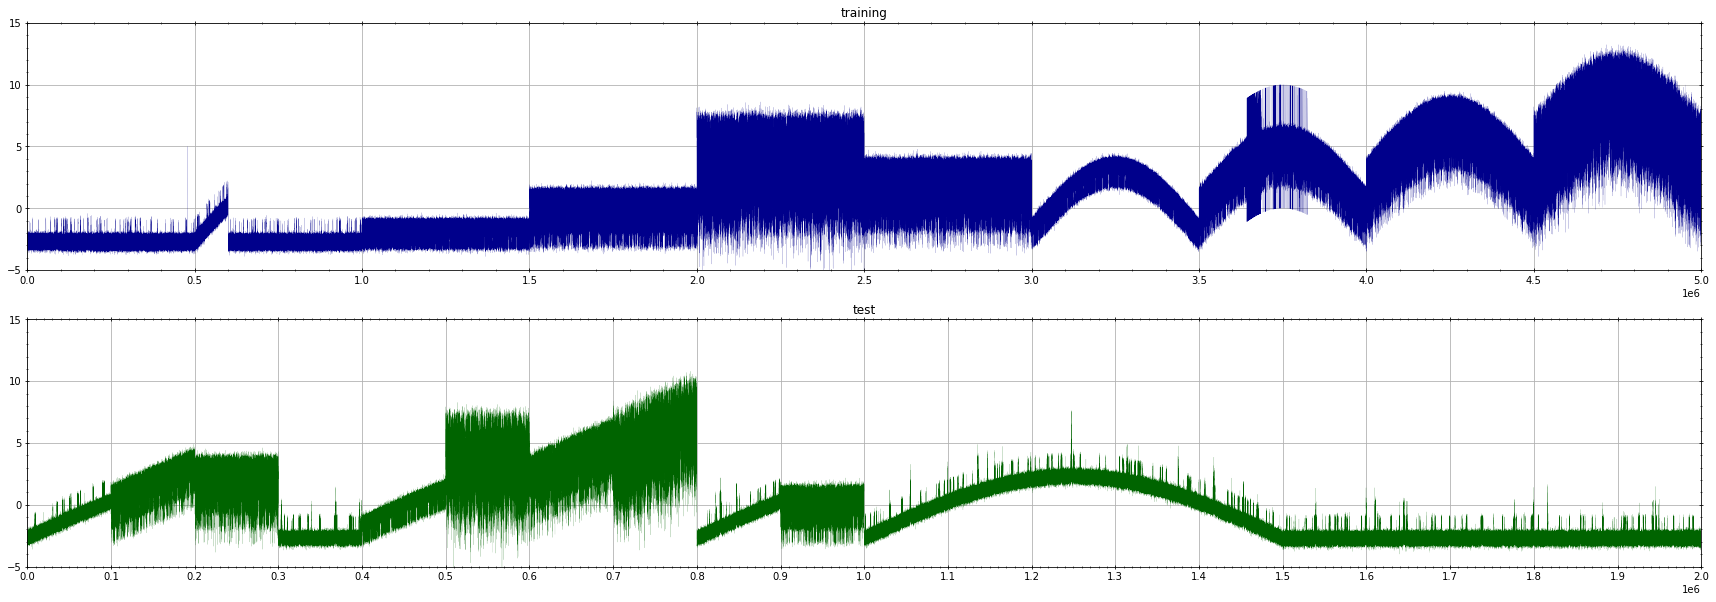

In [12]:
fig, axes = create_axes_grid(1,2,30,5)
set_axes(axes[0], x_val=[0,5000000,500000,100000], y_val=[-5,15,5,1])
axes[0].plot(train['signal'], color='darkblue', linewidth=.1);
axes[0].set_title('training')
set_axes(axes[1], x_val=[0,2000000,100000,10000], y_val=[-5,15,5,1])
axes[1].set_title('test')
axes[1].plot(test['signal'], color='darkgreen', linewidth=.1);

In [0]:
train_segm_separators = np.concatenate([[0,500000,600000], np.arange(1000000,5000000+1,500000)])
train_segm_signal_groups = [0,0,0,1,2,4,3,1,2,3,4] # from visual identification
train_segm_is_shifted = [False, True, False, False, False, False, False, True, True, True, True] # from visual identification
train_signal = np.split(train['signal'].values, train_segm_separators[1:-1])
train_opench = np.split(train['open_channels'].values, train_segm_separators[1:-1])

In [0]:
test_segm_separators = np.concatenate([np.arange(0,1000000+1,100000), [1500000,2000000]])
test_segm_signal_groups = [0,2,3,0,1,4,3,4,0,2,0,0] # from visual id
test_segm_is_shifted = [True, True, False, False, True, False, True, True, True, False, True, False] # from visual id
test_signal = np.split(test['signal'].values, test_segm_separators[1:-1])

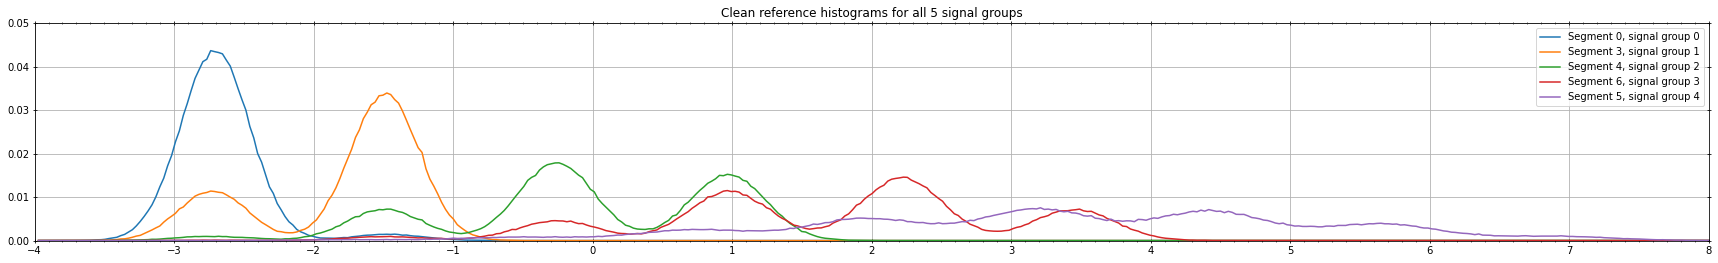

In [17]:
#create clean signal histograms
fig, axes = create_axes_grid(1,1,30,4)
set_axes(axes, x_val=[-4,8,1,.1], y_val=[0,0.05,0.01,0.01])

clean_hist = []
hist_bins = np.linspace(-4,10,500)

for j,i in enumerate([0,3,4,6,5]):
    clean_hist.append(np.histogram(train_signal[i], bins=hist_bins)[0])
    clean_hist[-1] = clean_hist[-1] / 500000 # normalize histogram
    axes.plot(hist_bins[1:], clean_hist[-1], label='Segment '+str(i)+', signal group '+str(j));
axes.legend();
axes.set_title("Clean reference histograms for all 5 signal groups");

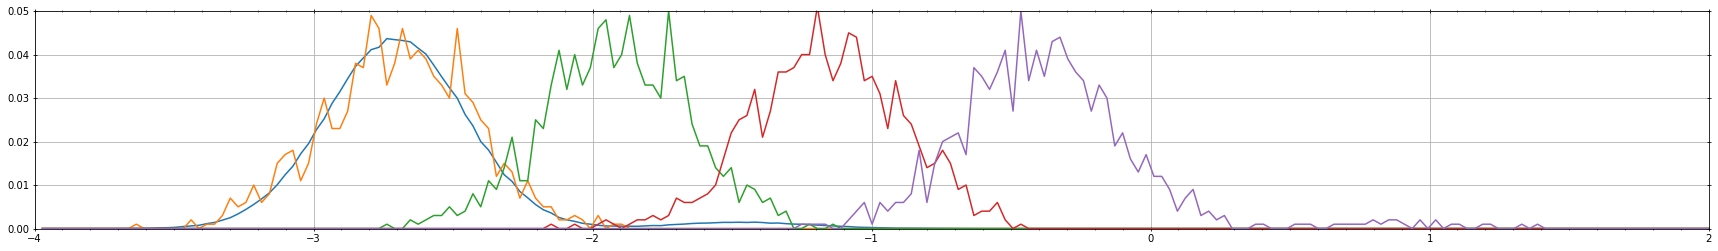

In [18]:
window_size = 1000

fig, axes = create_axes_grid(1,1,30,4)
set_axes(axes, x_val=[-4,2,1,.1], y_val=[0,0.05,0.01,0.01])

axes.plot(hist_bins[1:], clean_hist[0]);
for i in [0,25000,50000,75000]:
    window_hist = np.histogram(train_signal[1][i:i+window_size], bins=hist_bins)[0] / window_size
    axes.plot(hist_bins[1:], window_hist);

In [0]:
window_size = 1000
bin_width = np.diff(hist_bins)[0]
s_window = 10 # maximum absolute change in shift from window to window+1
train_signal_shift = []

for clean_id in range(len(train_segm_signal_groups)):
    
    group_id = train_segm_signal_groups[clean_id]
    window_shift = []
    prev_s = 0 # all signal groups start with shift=0
    window_data = train_signal[clean_id].reshape(-1,window_size)
    
    for w in window_data:
        window_hist = np.histogram(w, bins=hist_bins)[0] / window_size
        window_corr = np.array([ np.sum(clean_hist[group_id] * np.roll(window_hist, -s)) for s in range(prev_s-s_window, prev_s+s_window+1) ])
        prev_s = prev_s + np.argmax(window_corr) - s_window
        window_shift.append(-prev_s * bin_width)

    window_shift = np.array(window_shift)
    train_signal_shift.append(window_shift)  

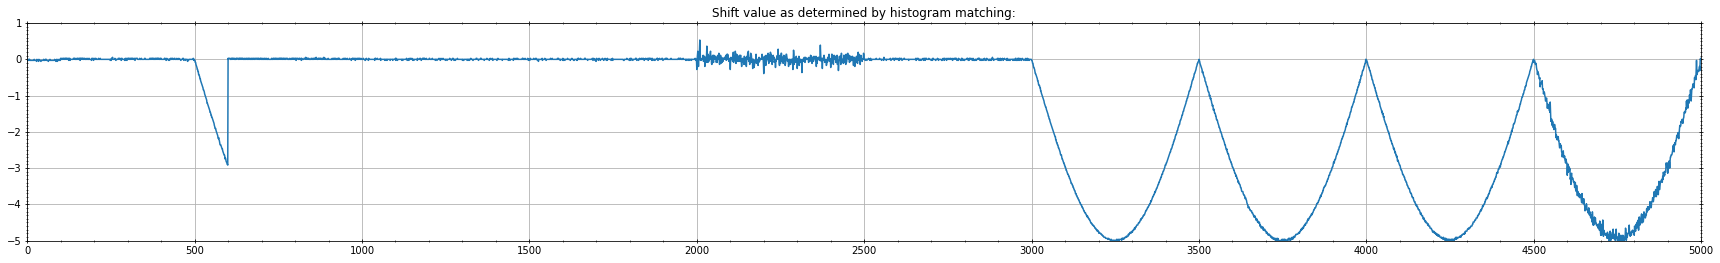

In [20]:
fig, axes = create_axes_grid(1,1,30,4)
set_axes(axes, x_val=[0,5000,500,100], y_val=[-5,1,1,.1])
axes.plot(np.concatenate(train_signal_shift));
axes.set_title("Shift value as determined by histogram matching:");

In [0]:
train_signal_shift_clean = []
train_signal_detrend = []

for data, use_fit, signal in zip(train_signal_shift, train_segm_is_shifted, train_signal):
    if use_fit:
        data_x = np.arange(len(data), dtype=float) * window_size + window_size/2
        fit = np.flip(np.polyfit(data_x, data, 4))
        data_x = np.arange(len(data) * window_size, dtype=float)
        data_2 = np.sum([ c * data_x ** i for i, c in enumerate(fit) ], axis=0)
    else:
        data_2 = np.zeros(len(data) * window_size, dtype=float)
        
    train_signal_shift_clean.append(data_2)
    train_signal_detrend.append(signal + data_2)

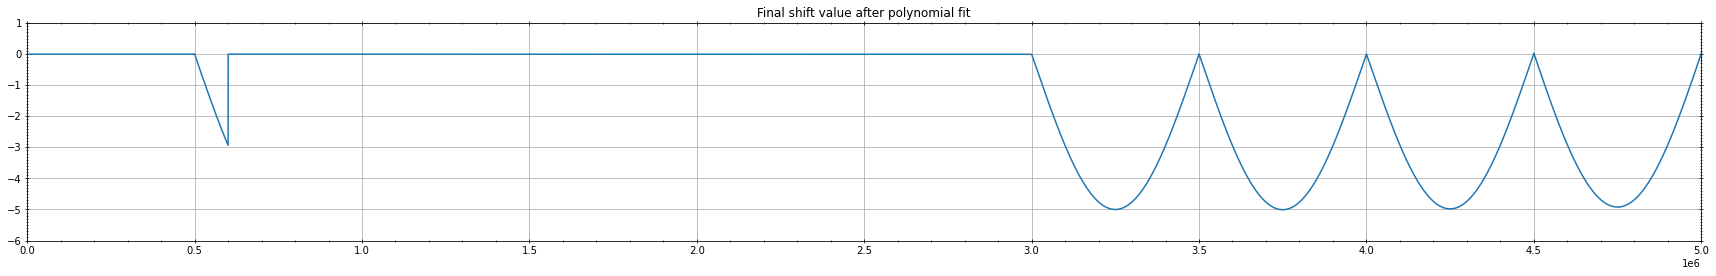

In [22]:
fig, axes = create_axes_grid(1,1,30,4)
set_axes(axes, x_val=[0,5000000,500000,100000], y_val=[-6,1,1,.1])
axes.plot(np.concatenate(train_signal_shift_clean));
axes.set_title("Final shift value after polynomial fit");

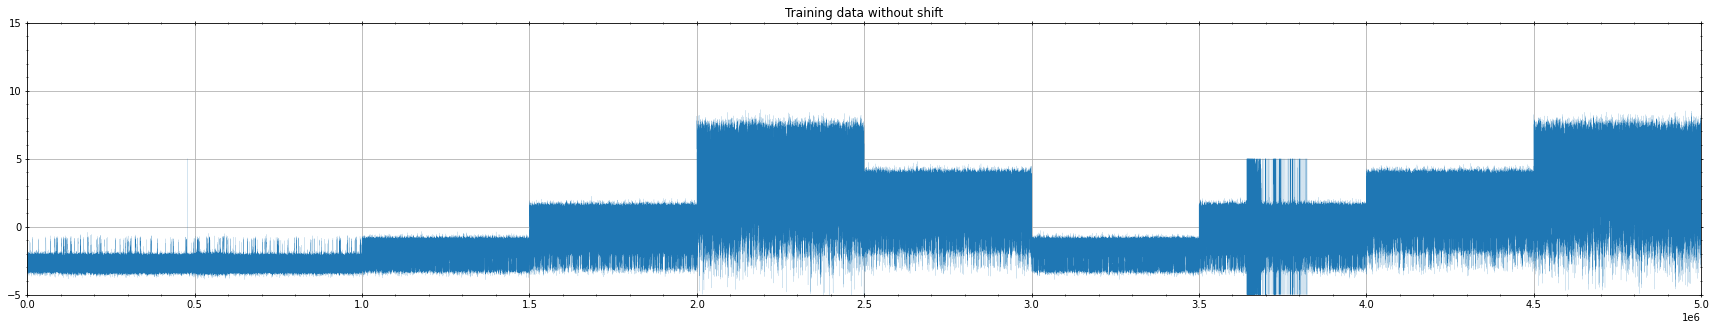

In [23]:
fig, axes = create_axes_grid(1,1,30,5)
set_axes(axes, x_val=[0,5000000,500000,100000], y_val=[-5,15,5,1])
axes.plot(np.concatenate(train_signal_detrend), linewidth=.1);
axes.set_title("Training data without shift");

In [0]:
window_size = 1000
bin_width = np.diff(hist_bins)[0]
s_window = 10
test_signal_detrend = []
test_signal_shift = []

for clean_id in range(len(test_segm_signal_groups)):
    
    group_id = test_segm_signal_groups[clean_id]
    window_shift = []
    prev_s = 0
    window_data = test_signal[clean_id].reshape(-1,window_size)
    
    for w in window_data:
        window_hist = np.histogram(w, bins=hist_bins)[0] / window_size
        window_corr = np.array([ np.sum(clean_hist[group_id] * np.roll(window_hist, -s)) for s in range(prev_s-s_window, prev_s+s_window+1) ])
        prev_s = prev_s + np.argmax(window_corr) - s_window
        window_shift.append(-prev_s * bin_width)

    window_shift = np.array(window_shift)
    test_signal_shift.append(window_shift)  

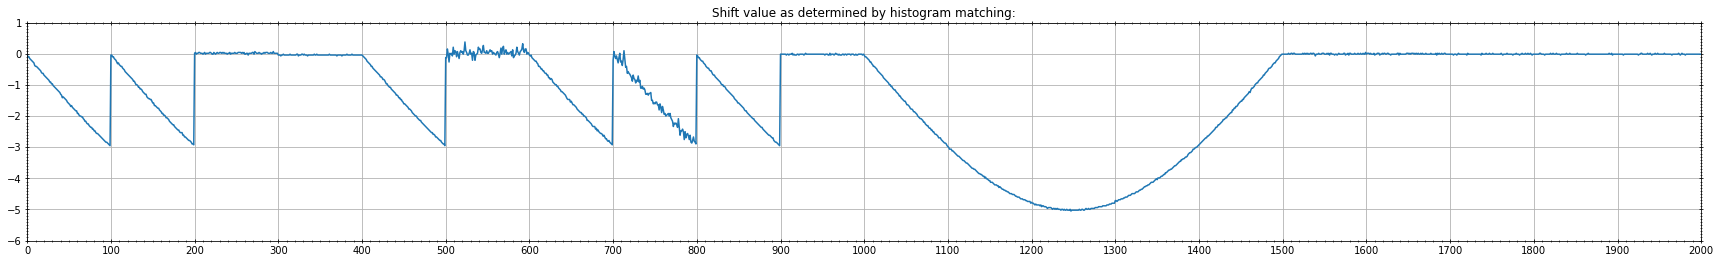

In [25]:
fig, axes = create_axes_grid(1,1,30,4)
set_axes(axes, x_val=[0,2000,100,10], y_val=[-6,1,1,.1])
axes.plot(np.concatenate(test_signal_shift));
axes.set_title("Shift value as determined by histogram matching:");

In [0]:
test_signal_shift_clean = []
test_signal_detrend = []
test_remove_shift = [True, True, False, False, True, False, True, True, True, False, True, False]

for data, use_fit, signal in zip(test_signal_shift, test_segm_is_shifted, test_signal):
    if use_fit:
        data_x = np.arange(len(data), dtype=float) * window_size + window_size/2
        fit = np.flip(np.polyfit(data_x, data, 4))
        data_x = np.arange(len(data) * window_size, dtype=float)
        data_2 = np.sum([ c * data_x ** i for i, c in enumerate(fit) ], axis=0)
    else:
        data_2 = np.zeros(len(data) * window_size, dtype=float)
        
    test_signal_shift_clean.append(data_2)
    test_signal_detrend.append(signal + data_2)

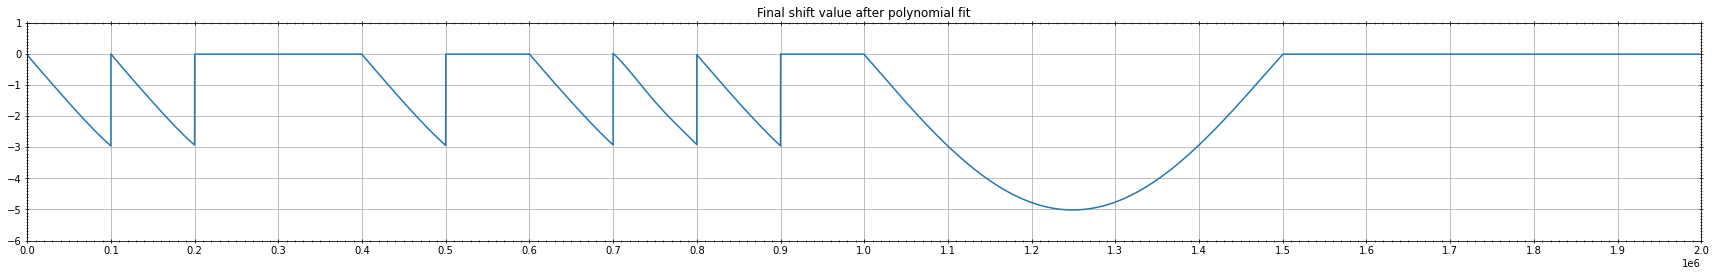

In [27]:
fig, axes = create_axes_grid(1,1,30,4)
set_axes(axes, x_val=[0,2000000,100000,10000], y_val=[-6,1,1,.1])
axes.plot(np.concatenate(test_signal_shift_clean));
axes.set_title("Final shift value after polynomial fit");

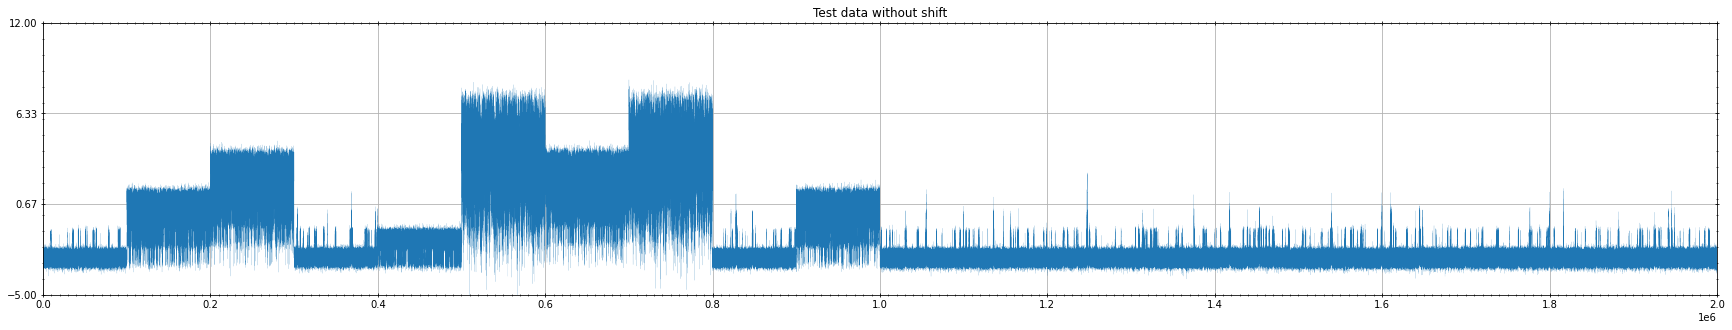

In [28]:
fig, axes = create_axes_grid(1,1,30,5)
set_axes(axes, x_val=[0,2000000,200000,10000], y_val=[-5,12,5,1])
axes.plot(np.concatenate(test_signal_detrend), linewidth=.1);
axes.set_title("Test data without shift");

In [0]:
np.savez_compressed(
        'gdrive/My Drive/Colab Notebooks/Kaggle/Liverpool_Ion_Switching/train_detrend.npz', 
        train_signal=train_signal_detrend, 
        train_opench=train_opench, 
        train_groups=train_segm_signal_groups
    )


In [0]:
np.savez_compressed(
        'gdrive/My Drive/Colab Notebooks/Kaggle/Liverpool_Ion_Switching/test_detrend.npz',
        test_signal=test_signal_detrend, 
        test_groups=test_segm_signal_groups
    )